In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.9.2


## 데이터 불러오기

In [2]:
import pandas as pd
df=pd.read_csv('auto.csv')

In [3]:
df

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,17.0
...,...,...,...,...,...,...,...,...
387,4,140.0,86.0,2790.0,15.6,82,1,27.0
388,4,97.0,52.0,2130.0,24.6,82,2,44.0
389,4,135.0,84.0,2295.0,11.6,82,1,32.0
390,4,120.0,79.0,2625.0,18.6,82,1,28.0


## 전처리

### Categorical Feature 처리하기

In [4]:
df['origin'].unique()

array([1, 3, 2])

In [5]:
origin = df.pop('origin')

In [6]:
df

,cylinders,displacement,horsepower,weight,acceleration,model_year,mpg
0,8,307.0,130.0,3504.0,12.0,70,18.0
1,8,350.0,165.0,3693.0,11.5,70,15.0
2,8,318.0,150.0,3436.0,11.0,70,18.0
3,8,304.0,150.0,3433.0,12.0,70,16.0
4,8,302.0,140.0,3449.0,10.5,70,17.0
...,...,...,...,...,...,...,...
387,4,140.0,86.0,2790.0,15.6,82,27.0
388,4,97.0,52.0,2130.0,24.6,82,44.0
389,4,135.0,84.0,2295.0,11.6,82,32.0
390,4,120.0,79.0,2625.0,18.6,82,28.0


In [7]:
df['USA']=(origin==1)*1.0
df['Europe']=(origin==2)*1.0
df['Japan']=(origin==3)*1.0
df

,cylinders,displacement,horsepower,weight,acceleration,model_year,mpg,USA,Europe,Japan
0,8,307.0,130.0,3504.0,12.0,70,18.0,1.0,0.0,0.0
1,8,350.0,165.0,3693.0,11.5,70,15.0,1.0,0.0,0.0
2,8,318.0,150.0,3436.0,11.0,70,18.0,1.0,0.0,0.0
3,8,304.0,150.0,3433.0,12.0,70,16.0,1.0,0.0,0.0
4,8,302.0,140.0,3449.0,10.5,70,17.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
387,4,140.0,86.0,2790.0,15.6,82,27.0,1.0,0.0,0.0
388,4,97.0,52.0,2130.0,24.6,82,44.0,0.0,1.0,0.0
389,4,135.0,84.0,2295.0,11.6,82,32.0,1.0,0.0,0.0
390,4,120.0,79.0,2625.0,18.6,82,28.0,1.0,0.0,0.0


### 다른방법

In [8]:
df=pd.read_csv('auto.csv')
df=pd.get_dummies(df, columns=['origin'], prefix='origin')
df

,cylinders,displacement,horsepower,weight,acceleration,model_year,mpg,origin_1,origin_2,origin_3
0,8,307.0,130.0,3504.0,12.0,70,18.0,1,0,0
1,8,350.0,165.0,3693.0,11.5,70,15.0,1,0,0
2,8,318.0,150.0,3436.0,11.0,70,18.0,1,0,0
3,8,304.0,150.0,3433.0,12.0,70,16.0,1,0,0
4,8,302.0,140.0,3449.0,10.5,70,17.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
387,4,140.0,86.0,2790.0,15.6,82,27.0,1,0,0
388,4,97.0,52.0,2130.0,24.6,82,44.0,0,1,0
389,4,135.0,84.0,2295.0,11.6,82,32.0,1,0,0
390,4,120.0,79.0,2625.0,18.6,82,28.0,1,0,0


### Input/Output(Label) 나누기

In [9]:
y = df.pop('mpg')
X = df

In [10]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
387    27.0
388    44.0
389    32.0
390    28.0
391    31.0
Name: mpg, Length: 392, dtype: float64

### 표준화, array 변환

In [11]:
X_std = (X-X.mean())/X.std() # 정규화
X_std = np.array(X_std) # array로 변환
y = np.array(y)

## 회귀모형 만들기

In [12]:
def build_model():
    model = keras.Sequential([
        layers.Dense(16, activation='relu',input_shape=[X_std.shape[1]]),
        layers.Dense(16, activation='relu'),
        layers.Dense(1) # activation 함수는 y값을 제한하게 되므로 회귀문제의 출력층에서는 지정 안 함
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',optimizer=optimizer)
    return model

In [13]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1_fit = model.fit(X_std, y, epochs=1000, validation_split=0.2)

In [15]:
hist = model1_fit.history
hist.keys()

dict_keys(['loss', 'val_loss'])

(0.0, 100.0)

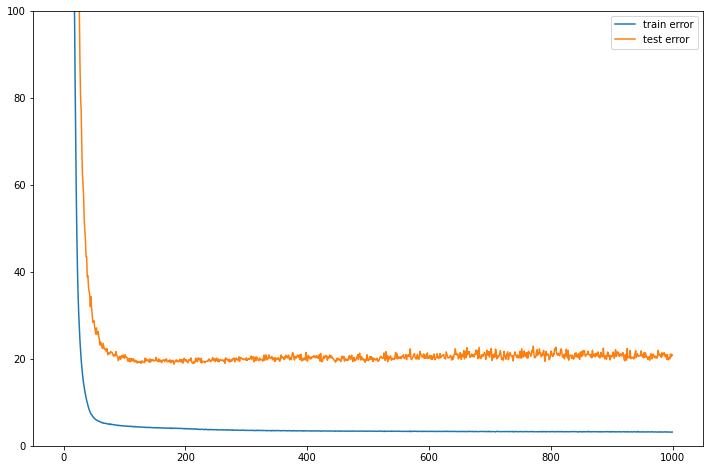

In [17]:
plt.figure(figsize=(12, 8))
plt.plot(hist['loss'], label='train error') # loss : mse
plt.plot(hist['val_loss'], label='test error')
plt.legend()
plt.ylim([0, 100])